<h3 align="right">MSN D1</h3>

# Single-cell simulation

## Model data

In [1]:
import cell_model, cell_evaluator
morphofile = 'morphology/WT-P270-20-14ak.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'Step5.soma.v': 'expdata/ECBL_IV_ch1_561.dat',
    'Step8.soma.v': 'expdata/ECBL_IV_ch1_567.dat',
    'Step11.soma.v': 'expdata/ECBL_IV_ch1_572.dat',
    'Step1.soma.v': 'expdata/ECBL_IDthresh_ch1_603.dat',
    'Step2.soma.v': 'expdata/ECBL_IDthresh_ch1_608.dat'
}

## Simulation environment

In [2]:
!nrnivmodl mechanisms

/home/akozlov/prog/optim/bgopt/cells/msn_d1_all-6-20170524
mechanisms/bk.mod mechanisms/cadyn.mod mechanisms/cal12.mod mechanisms/cal13.mod mechanisms/caldyn.mod mechanisms/can.mod mechanisms/caq.mod mechanisms/car.mod mechanisms/cat32.mod mechanisms/cat33.mod mechanisms/kaf.mod mechanisms/kas.mod mechanisms/kdr.mod mechanisms/kdrf.mod mechanisms/kdrs.mod mechanisms/kir.mod mechanisms/kir21.mod mechanisms/kir23.mod mechanisms/kirin.mod mechanisms/kmf.mod mechanisms/kms.mod mechanisms/naf.mod mechanisms/nap.mod mechanisms/sk.mod
bk.mod cadyn.mod cal12.mod cal13.mod caldyn.mod can.mod caq.mod car.mod cat32.mod cat33.mod kaf.mod kas.mod kdr.mod kdrf.mod kdrs.mod kir.mod kir21.mod kir23.mod kirin.mod kmf.mod kms.mod naf.mod nap.mod sk.mod
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -g -O2 -c mod_func.

In [3]:
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def plot_responses(responses, expdata=None, junction_potential=0):
    fig, axes = plt.subplots(len(responses), figsize=(8,12))
    for index, (name, response) in enumerate(sorted(responses.items())):
        if name in expdata:
            data = np.loadtxt(expdata[name])
            time = data[:,0]
            voltage = data[:,1] - junction_potential
            axes[index].plot(time, voltage, color='lightgrey', linewidth=3)
        axes[index].plot(response['time'], response['voltage'])
        axes[index].set_title(name)
    fig.tight_layout()

## Cell model definition

In [6]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [7]:
cell = ephys.models.CellModel(
    'msn_d1', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print cell

msn_d1:
  morphology:
    morphology/WT-P270-20-14ak.swc
  mechanisms:
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kdrf.basal: kdrf at ['basal']
    kir23.basal: kir23 at ['basal']
    cal12.basal: cal12 at ['basal']
    cal13.basal: cal13 at ['basal']
    car.basal: car at ['basal']
    cat32.basal: cat32 at ['basal']
    cat33.basal: cat33 at ['basal']
    cadyn.basal: cadyn at ['basal']
    caldyn.basal: caldyn at ['basal']
    sk.basal: sk at ['basal']
    bk.basal: bk at ['basal']
    pas.all: pas at ['all']
    naf.axonal: naf at ['axonal']
    nap.axonal: nap at ['axonal']
    kas.axonal: kas at ['axonal']
    kdrs.axonal: kdrs at ['axonal']
    kmf.axonal: kmf at ['axonal']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kdrf.somatic: kdrf at ['somatic']
    kir23.somatic: kir23 at ['somatic']
    cal12.somatic: cal12 at ['somatic']
    cal13.somatic: cal13 at

In [8]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print x

gbar_bk.basal
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.axonal
gbar_kas.basal
gbar_kas.somatic
gbar_kdrf.basal
gbar_kdrf.somatic
gbar_kdrs.axonal
gbar_kmf.axonal
gbar_naf.axonal
gbar_naf.basal
gbar_naf.somatic
gbar_nap.axonal
gbar_sk.basal
gbar_sk.somatic


## Cell evaluator

In [9]:
simulator = ephys.simulators.NrnSimulator()

In [10]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Experimental protocol

In [11]:
import json
hall_of_fame = json.load(open('hall_of_fame.json'))
import pandas
pandas.options.display.float_format = '{:,.5g}'.format
pandas.DataFrame(hall_of_fame).T

0          1          2          3          4  \
gbar_bk.basal     0.00086975 0.00051693 0.00045329 0.00071973 0.00085552   
gbar_bk.somatic   0.00038752 0.00085921 0.00025705 0.00040257 0.00051535   
gbar_kaf.basal    0.00059138  0.0007923  0.0010678 0.00017154 0.00035886   
gbar_kaf.somatic    0.029163 0.00029362  0.0081778 0.00087908  0.0018689   
gbar_kas.axonal     0.041056   0.053442  0.0090743   0.079596   0.023552   
gbar_kas.basal     0.0034534  0.0064689  0.0060741  0.0012011  0.0027442   
gbar_kas.somatic   0.0011103   0.032043    0.06757   0.012521   0.019638   
gbar_kdrf.basal   0.00028831  0.0001761  0.0009996  0.0003066 0.00014948   
gbar_kdrf.somatic 0.00082885 0.00083283 0.00039149 0.00076132 0.00063213   
gbar_kdrs.axonal   0.0022532  0.0062631  0.0094242  0.0095133  0.0099901   
gbar_kmf.axonal   0.00063742 0.00054592 0.00028007 0.00016849 0.00098311   
gbar_naf.axonal       2.6773     2.4256     3.8341     6.4725     4.2084   
gbar_naf.basal       0.04592   0.063185   0.092558   0.076523   0.081952   
gbar_naf.somatic      13.534      17.22       19.2     9.7044     10.886   
gbar_nap.axonal   0.00076567 0.00096652 0.00088304 0.00062863 0.00093701   
gbar_sk.basal      0.0012476  0.0046588 0.00024579  0.0070713 0.00043556   
gbar_sk.somatic    0.0059483  0.0029807 0.00052029  0.0084252  0.0010655   

                           5          6          7          8          9  
gbar_bk.basal     0.00039597 0.00014189 0.00067191 0.00021295 0.00023685  
gbar_bk.somatic   5.9978e-05 0.00087563 0.00087754 0.00092321 0.00058292  
gbar_kaf.basal    0.00055699  0.0020106  0.0042524 9.4458e-06  0.0011843  
gbar_kaf.somatic    0.012568   0.028569  0.0096488  0.0004336   0.037179  
gbar_kas.axonal     0.098895   0.027456   0.083137   0.064738   0.028905  
gbar_kas.basal     0.0056201  0.0040111  0.0058319   0.001318   0.005339  
gbar_kas.somatic    0.040468   0.053331   0.016392  0.0093703   0.030046  
gbar_kdrf.basal   0.00053433 0.00034096 0.00035137 0.00038974 0.00019319  
gbar_kdrf.somatic 8.6305e-05 0.00010783 0.00011122 4.7836e-05 0.00025666  
gbar_kdrs.axonal   0.0030427  0.0059445  0.0026612   0.009065  0.0048738  
gbar_kmf.axonal   0.00098825 0.00081271 0.00019697 0.00083375 0.00087323  
gbar_naf.axonal        3.766     5.7429     9.3376     1.9573     2.7943  
gbar_naf.basal      0.087499   0.032181   0.089155   0.037968   0.093183  
gbar_naf.somatic      19.473     19.554      18.11     10.542     19.145  
gbar_nap.axonal   0.00070351 6.9246e-05 0.00098967  0.0004416 0.00027588  
gbar_sk.basal      0.0087398  0.0050955  0.0058421  0.0098909  0.0023092  
gbar_sk.somatic    0.0026151   0.004236 0.00058753 0.00050689 0.00018623

In [33]:
test_parameters = hall_of_fame[3]
#test_parameters['gbar_naf.basal']=0.5
#test_parameters['gbar_naf.somatic']=12
#test_parameters['gbar_sk.somatic']=0
#test_parameters['gbar_bk.somatic']=0.00
#test_parameters['gbar_kaf.somatic']=0.18

In [34]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

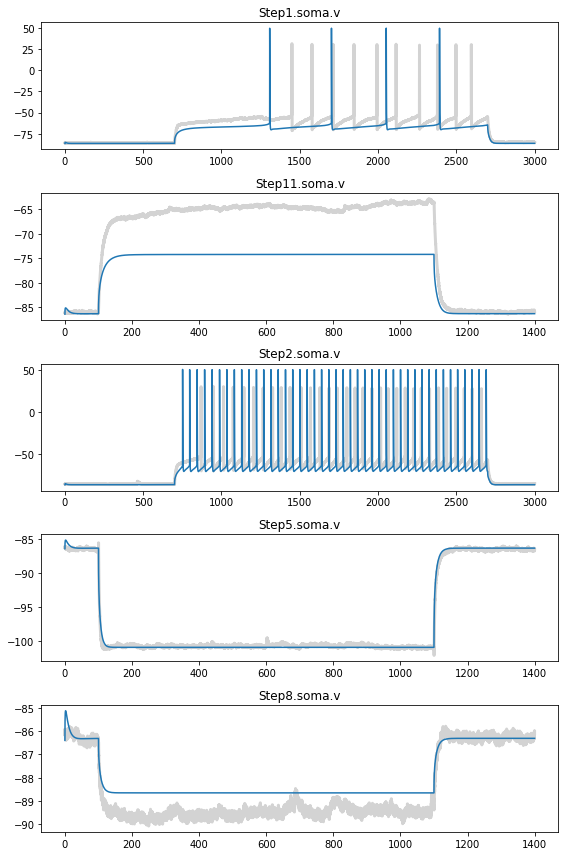

In [35]:
plot_responses(test_responses, expdata=expdata, junction_potential=9.5)

In [15]:
import efel
traces = []
names = []
for i in [5, 8, 11]:
    name = 'Step%d.soma.v' % i
    response = test_responses[name]
    trace = {}
    trace['T'] = response['time']
    trace['V'] = response['voltage']
    trace['stim_start'] = [100]
    trace['stim_end'] = [1100]
    traces.append(trace)
    names.append(name)

import json
f=json.load(open('config/features.json'))
features = f['Step5'].values()[0].keys()

results = efel.getFeatureValues(traces, features)
import pandas
pandas.DataFrame(results, index=names).T

Step5.soma.v      Step8.soma.v  \
Spikecount                                   [0]               [0]   
decay_time_constant_after_stim   [6.92258551418]   [7.85757228683]   
voltage_base                    [-86.3163777067]  [-86.3163777067]   
voltage_deflection              [-15.0833673274]  [-2.79263804127]   

                                   Step11.soma.v  
Spikecount                                   [0]  
decay_time_constant_after_stim   [10.0664512405]  
voltage_base                    [-86.3163777067]  
voltage_deflection               [11.6367298259]

In [16]:
import efel
traces = []
names = []
for i in [1, 2]:
    name = 'Step%d.soma.v' % i
    response = test_responses[name]
    trace = {}
    trace['T'] = response['time']
    trace['V'] = response['voltage']
    trace['stim_start'] = [700]
    trace['stim_end'] = [2700]
    traces.append(trace)
    names.append(name)

import json
f=json.load(open('config/features.json'))
features = f['Step1'].values()[0].keys()
#features.append('ISI_CV')
#features.append('AHP_time_from_peak')
#features.append('AHP_slow_time')
#features.append('AP_begin_voltage')

results = efel.getFeatureValues(traces, features)
import pandas
pandas.DataFrame(results, index=names).T

Step1.soma.v  \
AHP1_depth_from_peak                                        [119.739057797]   
AHP2_depth_from_peak                                        [119.438613824]   
AP1_amp                                                     [109.425234015]   
AP1_width                                                  [0.918233316602]   
AP2_amp                                                     [109.725396624]   
AP2_width                                                   [1.03574006202]   
AP_begin_voltage          [-60.0271794247, -60.5821890754, -60.248093792...   
ISI_CV                                                     [0.019462594296]   
adaptation_index2                                        [-0.0137621324062]   
mean_frequency                                              [2.36308855675]   
steady_state_voltage                                       [-85.6275581177]   
time_to_first_spike                                                 [607.9]   
voltage_base                                               [-86.3094634048]   
voltage_deflection_begin                                    [18.6144934173]   

                                                               Step2.soma.v  
AHP1_depth_from_peak                                        [120.782377362]  
AHP2_depth_from_peak                                        [120.784330744]  
AP1_amp                                                     [111.997609719]  
AP1_width                                                   [1.02747177546]  
AP2_amp                                                     [110.988866727]  
AP2_width                                                  [0.954527819878]  
AP_begin_voltage          [-61.79016281, -60.9150582315, -61.1401891434,...  
ISI_CV                                                    [0.0155753727525]  
adaptation_index2                                      [-0.000481838728354]  
mean_frequency                                              [21.5982721382]  
steady_state_voltage                                       [-85.8684648117]  
time_to_first_spike                                         [51.6000000001]  
voltage_base                                               [-86.3094634048]  
voltage_deflection_begin                                    [21.6550753037]

In [17]:
import json
with open('best_parameters.json', 'w') as fp:
    json.dump(test_parameters, fp, indent=4, sort_keys=True)